In [1]:
# knn
import numpy as np
import matplotlib.pyplot as plt
import seaborn; seaborn.set() # plot styling

In [9]:
rand = np.random.RandomState(42)
X = rand.randn(10, 2) # 10 by 2
print(X[1:6])


[[ 0.64768854  1.52302986]
 [-0.23415337 -0.23413696]
 [ 1.57921282  0.76743473]
 [-0.46947439  0.54256004]
 [-0.46341769 -0.46572975]]


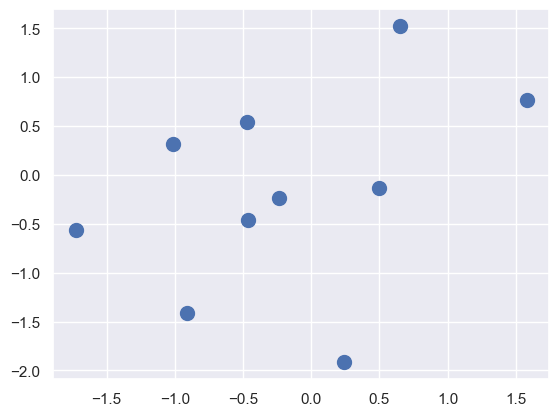

In [10]:
plt.scatter(X[:, 0], X[:, 1], s = 100); # equiv. x, y # the semicolon is necessary

In [37]:
# compute the distance between points
dist_sq = np.sum((X[:, np.newaxis, :] - X[np.newaxis, :, :]) ** 2, axis=-1)

In [16]:
# each pair of points, compute difference in coordinates
diff = X[:, np.newaxis, :] - X[np.newaxis, :, :]
diff.shape

(10, 10, 2)

The three dimensions are these:
- (x1 - x1, x1 - x2, ..., x1 - x10) two dimensions
- (x2 - x1, x2 - x2, ..., x2 - x10) two dimensions
- ...
- (x10 - x1, x10 - x2, ... x10 - x10) two dimensions

In [35]:
print(X[0:2, np.newaxis, :])
print(X[np.newaxis, 0:2, :])

[[[ 0.49671415 -0.1382643 ]]

 [[ 0.64768854  1.52302986]]]
[[[ 0.49671415 -0.1382643 ]
  [ 0.64768854  1.52302986]]]


In [36]:
X[0:2, np.newaxis, :] - X[np.newaxis, 0:2, :]

array([[[ 0.        ,  0.        ],
        [-0.15097439, -1.66129416]],

       [[ 0.15097439,  1.66129416],
        [ 0.        ,  0.        ]]])

In [19]:

diff[0, 0:2, :]

array([[ 0.        ,  0.        ],
       [-0.15097439, -1.66129416]])

In [20]:
diff[0:2, 0, :]

array([[0.        , 0.        ],
       [0.15097439, 1.66129416]])

In [24]:
X[0,:] - X[1,:] # equiv. X[0]-X[1]

array([-0.15097439, -1.66129416])

In [27]:
sq_diff = diff**2 # squared difference
sq_diff.shape

(10, 10, 2)

In [38]:
# sum the coordinate differences
# sum(dx^2 + dy^2)
dist_sq = sq_diff.sum(-1) # along the last axis
print(dist_sq)

[[ 0.          2.78269154  0.54335891  1.99209409  1.39704208  1.02908678
   3.21558012  5.11544438  2.48349371  3.59646588]
 [ 2.78269154  0.          3.86528037  1.43866148  2.20937405  5.18972184
  11.97284091  9.97780959  4.21848073 11.03642483]
 [ 0.54335891  3.86528037  0.          4.29144278  0.65863421  0.10619735
   3.04620829  2.33006147  0.90706436  1.8421786 ]
 [ 1.99209409  1.43866148  4.29144278  0.          4.24768787  5.69303403
   8.97447179 12.68544062  6.92407058 10.93760698]
 [ 1.39704208  2.20937405  0.65863421  4.24768787  0.          1.016685
   6.53729364  2.79682641  0.34736323  4.01381809]
 [ 1.02908678  5.18972184  0.10619735  5.69303403  1.016685    0.
   2.59296332  1.60070601  0.91021937  1.09367707]
 [ 3.21558012 11.97284091  3.04620829  8.97447179  6.53729364  2.59296332
   0.          5.69379866  6.53638556  1.5734461 ]
 [ 5.11544438  9.97780959  2.33006147 12.68544062  2.79682641  1.60070601
   5.69379866  0.          1.27538085  1.3898429 ]
 [ 2.48349

In [43]:
np.argsort(dist_sq[0]) # distance from point 0
print(np.argsort(dist_sq[1]) )# distance from point 1
print(dist_sq[1])
# 2nd (1) has value 0 - the smallest, hence first place
# 4th (3) has value 1.43, hence second place

[1 3 4 0 2 8 5 7 9 6]
[ 2.78269154  0.          3.86528037  1.43866148  2.20937405  5.18972184
 11.97284091  9.97780959  4.21848073 11.03642483]


In [32]:
# find indices
# the first column has elements in order, since 0 distances are on the diagnonal with ascending rows
nearest_id = np.argsort(dist_sq, axis = 1) # the index for each row

array([[0, 2, 5, 4, 3, 8, 1, 6, 9, 7],
       [1, 3, 4, 0, 2, 8, 5, 7, 9, 6],
       [2, 5, 0, 4, 8, 9, 7, 6, 1, 3],
       [3, 1, 0, 4, 2, 5, 8, 6, 9, 7],
       [4, 8, 2, 5, 0, 1, 7, 9, 3, 6],
       [5, 2, 8, 4, 0, 9, 7, 6, 1, 3],
       [6, 9, 5, 2, 0, 7, 8, 4, 3, 1],
       [7, 8, 9, 5, 2, 4, 0, 6, 1, 3],
       [8, 4, 2, 5, 7, 0, 9, 1, 6, 3],
       [9, 5, 7, 6, 2, 8, 0, 4, 3, 1]])

In [51]:
K = 2
nearest_partition = np.argpartition(dist_sq, K, axis = 1)

In [52]:
nearest_partition

array([[0, 2, 5, 3, 4, 1, 6, 7, 8, 9],
       [1, 3, 4, 0, 2, 5, 6, 7, 8, 9],
       [2, 5, 0, 3, 4, 1, 6, 7, 8, 9],
       [3, 1, 0, 2, 4, 5, 6, 7, 8, 9],
       [4, 8, 2, 3, 0, 5, 6, 7, 1, 9],
       [5, 2, 8, 3, 4, 0, 6, 7, 1, 9],
       [6, 9, 5, 3, 4, 2, 0, 7, 8, 1],
       [7, 8, 9, 3, 4, 5, 6, 0, 1, 2],
       [8, 4, 2, 3, 1, 5, 6, 7, 0, 9],
       [9, 5, 7, 3, 4, 1, 6, 2, 8, 0]])

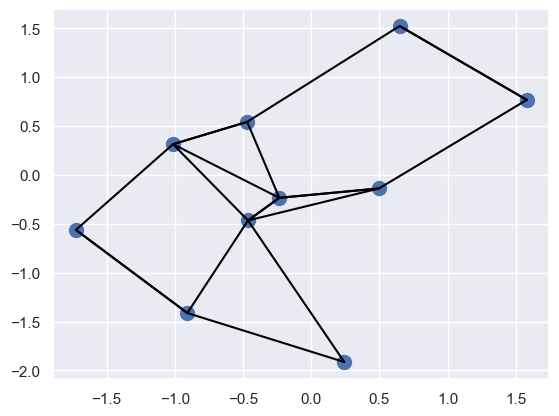

In [58]:
plt.scatter(X[:, 0], X[:, 1], s=100)

# draw lines from each point to its two nearest neighbors
K = 2

for i in range(X.shape[0]):
    for j in nearest_partition[i, :K+1]:
        # ith row, k+1 because K selecting 0:1 only gives 0
        # plot a line from X[i] to X[j]
        # use some zip magic to make it happen:
        plt.plot(*zip(X[j], X[i]), color='black')